# Student Grade Prediction

# EDA

In [1]:
# Library Used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py

In [2]:
df = pd.read_csv("student-mat.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Insight (Gender Distribution)

In [4]:
# Values converted to percentage
df_sex = df['sex'].value_counts(normalize = True)
print(f'People divided by target in percentage: \n{df_sex}')

People divided by target in percentage: 
F    0.526582
M    0.473418
Name: sex, dtype: float64


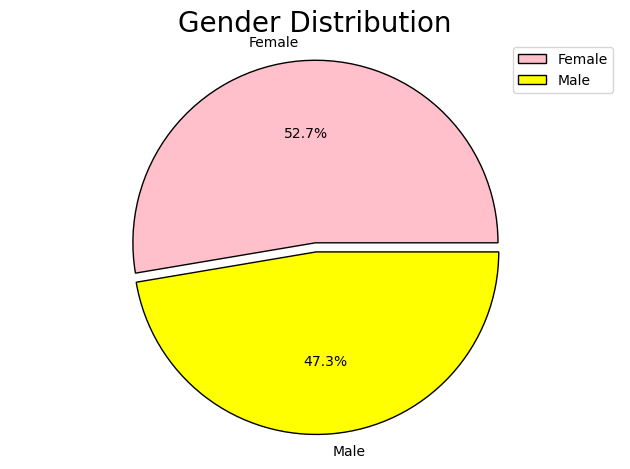

In [5]:
# Pie chart using matplotlib
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
plt.pie(df_sex, 
        labels = ['Female','Male'],
        colors = ['pink', 'yellow'],
        autopct = '%0.1f%%',
        explode = [0, 0.05],
        wedgeprops = wp
      );
plt.title("Gender Distribution",fontsize=20)
plt.legend(loc = 'upper right')
plt.axis('equal')
plt.tight_layout()


### Overall, there is equal distribution of gender in the school. However, if we dig it in a accurate sense, females dominate over 5.4% more than male.

# Insight (Age Distribution)

C:\Users\Abinesh T.A\AppData\Local\Temp\ipykernel_13844\3070705668.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  b = sns.kdeplot(df['age'],shade= True,color="yellow").set(xlabel = "Age")


Text(0.5, 1.0, 'Age of the Current Students')

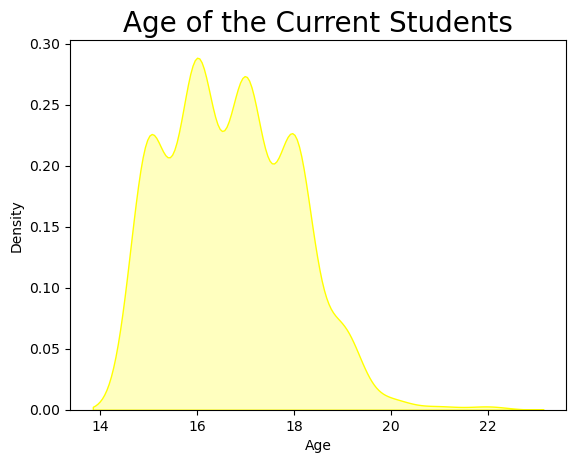

In [6]:
b = sns.kdeplot(df['age'],shade= True,color="yellow").set(xlabel = "Age")
plt.title("Age of the Current Students",fontsize = 20)

### The current students that both schools have huge count of late adolescence. Especially the students of age between 16-17 occupying a lot of space on the school campuses.

# Insight

Text(0.5, 1.0, 'Age Wise Average Grades')

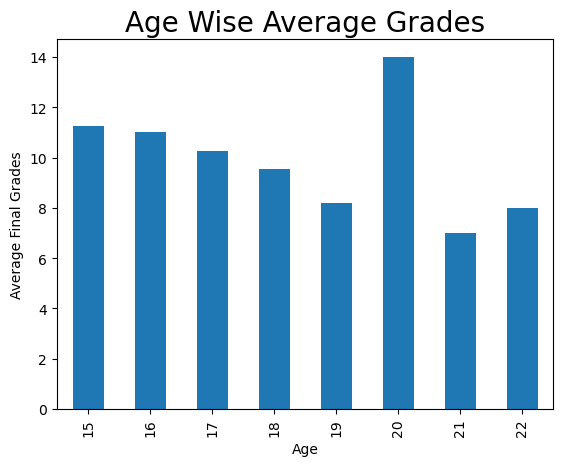

In [7]:
df_age = df.groupby("age")["G3"].mean()
dfss = df_age.plot.bar()
dfss.set_xlabel("Age")
dfss.set_ylabel("Average Final Grades")
plt.title("Age Wise Average Grades",fontsize=20)

### On average we can see that students who are aged 20 are scoring greater grades compared to other age. If we see the pattern in the bar chart, the average scores are reducing as the age increases but it decreases after that.  Some mysterious trend we can find from this chart. Is it the same if the final scores and age are brought in the form of box plot? There could be outliers too as average scores gets affected by the outliers. Let us see this in the next insight.

# Insight 

Text(0.5, 1.0, 'Age Wise Final Grades')

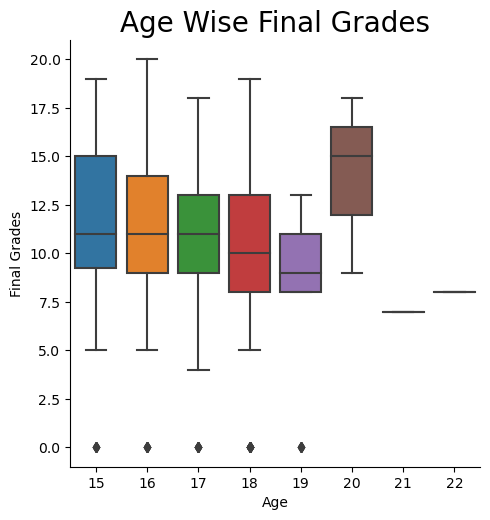

In [8]:
sns.catplot(data=df, x="age", y="G3", kind="box").set(xlabel="Age",ylabel="Final Grades")
plt.title("Age Wise Final Grades",fontsize=20)

### Surprisingly, even the box plot also supports the bar chart above. The median value come around the bracket of 15 marks. However, the 20 years old kids did not score the maximum marks even though most of them scored good marks. 

### In summary, we can conclude by this insight as well as above, the age of the kids does not matter to tell their intelligence. So, we must analyse further factors to know the triggers for good grades. 

![](https://i0.wp.com/700011.xyz/files/funotic/kids/why_kids_smarter_05.gif?w=618&ssl=1)

# Insight (Has study time affected the scores?)

In [9]:
#Replacing the numerical values with appropriate categorical values
df["studytime"] = df[['studytime']].replace({1: '<2 hours', 2: '2 to 5 hours',3:"5 to 10 hours",4:">10 hours"})

Text(0.5, 1.0, 'Study Time Over Final Grades')

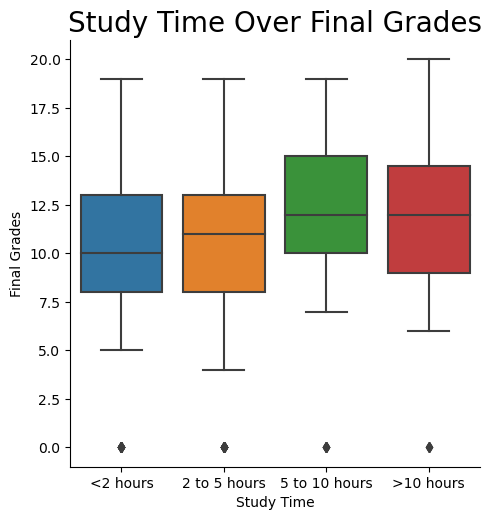

In [10]:
sns.catplot(data=df, x="studytime", y="G3", kind="box", order=['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours']).set(xlabel="Study Time",ylabel="Final Grades")
plt.title("Study Time Over Final Grades",fontsize=20)

### The study timing of the students have affected the final grades but not very significatly. Although the highest grade is scored by a kid who studies more than ten hours a day, there are students who scored less marks compared to the one who studies less time. We can see students who studies less than 2 hours matching the grades or even getting higher grades than the one who studies a lot.
### Through this we can conclude that not only studying for a lot of time can acheive great grades. Probably, this result might hurt the one who is really studying lot of time.
### There might chances that school scoring marks according to some form of partiality. However, it is still unkown. 

![](https://media.giphy.com/media/1pA8bP2BfZFG9hg4uM/giphy.gif)

# Insight 

Text(0.5, 1.0, 'Final Grade with Previous Failures')

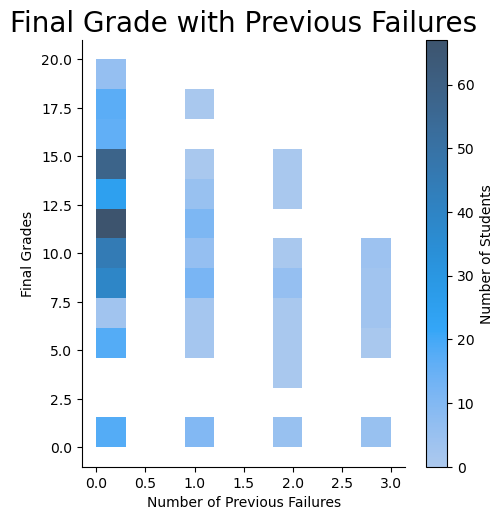

In [11]:
sns.displot(df, x="failures",y="G3",cbar_kws={"label": "Number of Students"},cbar=True).set(xlabel = "Number of Previous Failures",ylabel = "Final Grades")
plt.title("Final Grade with Previous Failures",fontsize=20)


### Hmmm, we can find that the most of the students who were failed at previous exams, were able to score less marks compared to the successful candidates in previous exams. However, the scores of successful candidate is not that great to be delighted. Only few people scored without failure above 18 marks. Overall, we can conclude that the school lacks bright students in academics.
### Probably, school must change their academic policy to enhance the academic level of students or else the teachers who teach should be replaced.

# Insight 

[Text(0.5, 0, 'Period Exam Grades'), Text(0, 0.5, 'Final Exam Grades')]

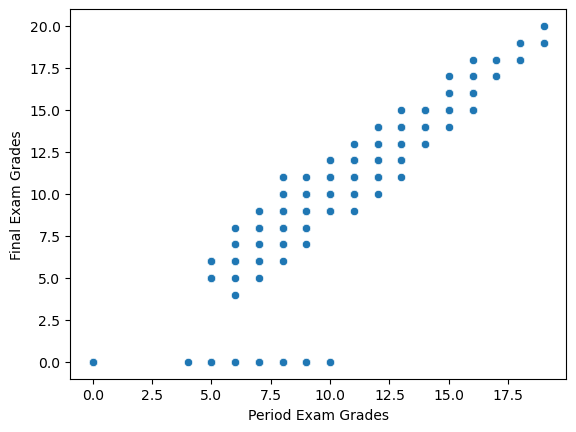

In [12]:
sns.scatterplot(df,x="G2",y="G3").set(xlabel="Period Exam Grades",ylabel="Final Exam Grades")


### There is a positive correlation between the period exam grades and final exam grades. There are students who have improved their scores as well as decreased from their period exams. The difference between two grades is not that high. This shows that students have nailed in their consistency in their grades. The outliers in the might be the one's who failed to attend the final exams.

### Now comes the interesting part. Is it the girls or boys who scored good marks in the final exam? Let's see in the upcoming insight......

# Insight (Girls vs Boys)

Text(0.5, 0, 'Gender')

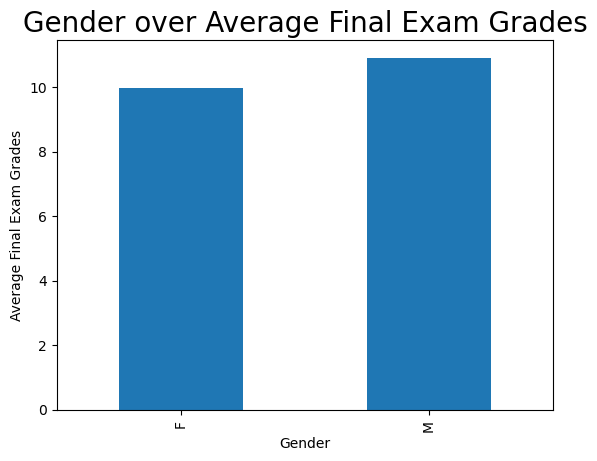

In [13]:
# Grouping the dataframe by sex in final score
df_sex = df.groupby("sex")["G3"].mean()
dff = df_sex.plot.bar()
dff.set_title("Gender over Average Final Exam Grades",fontsize=20)
dff.set_ylabel("Average Final Exam Grades")
dff.set_xlabel("Gender")


[Text(0, 0.5, 'Final Grades'), Text(0.5, 0, 'Gender')]

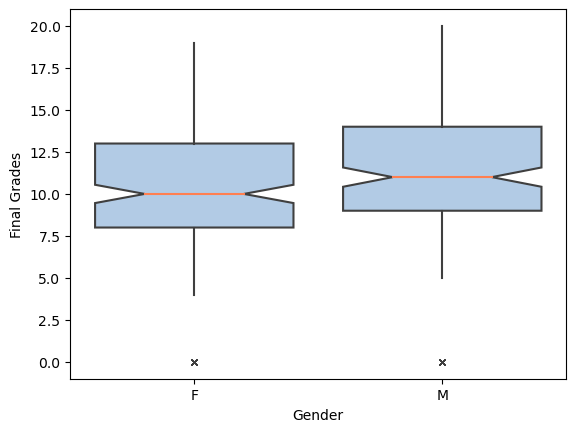

In [14]:
sns.boxplot(
    data=df, x="sex", y="G3",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}).set(ylabel = 'Final Grades',xlabel="Gender")



### While looking at the graph one can conclude that boys have performed well than girls at the final exam. On average boys have scored much higher than girls. Even the maximum scorer for this final exam is also a boy. On the other side girls have scored the lowest marks too. This result is little surprising for the school which has equally ditributed gender division. Althought the conclusion is told in a eagle's eye view, in actual result there is not much difference of marks between girls and boys.

![](https://media1.tenor.com/images/ee98e41e5324b3dca57e23037b65f96f/tenor.gif?itemid=17290996)

# Insight 

[Text(0.5, 0, 'Absenteeism'), Text(0, 0.5, 'Final Exam Grades')]

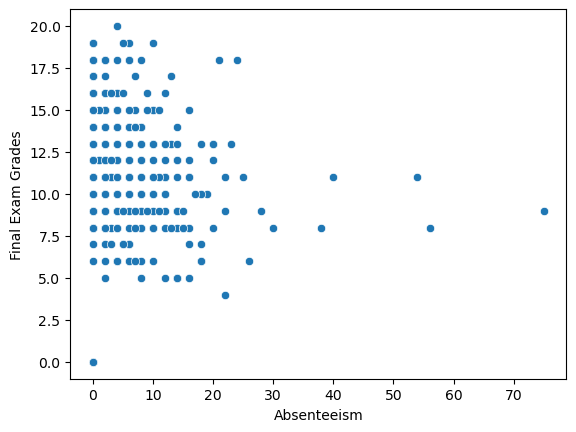

In [15]:
sns.scatterplot(df,x="absences",y="G3").set(xlabel="Absenteeism",ylabel="Final Exam Grades")


### There is no proper correlation between the absenteeism and the final exam grades. This shows that even if students take some leave there is no much difference in their marks. LoL, surprisingly there students who have not even taken a single leave in their school life but scored very low marks. I hope these people do not come to study to school.

![](https://media1.tenor.com/images/e56901d0776eb8b701bbc240942809bb/tenor.gif?itemid=7713236)

# Decision tree model comparison with multiple regression

In [16]:
df = pd.read_csv("student-mat.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [18]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [19]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [20]:
# Creating dataframe for a category columns
da = df.select_dtypes(include="object")

In [21]:
da

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [22]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Mjob        395 non-null    object
 6   Fjob        395 non-null    object
 7   reason      395 non-null    object
 8   guardian    395 non-null    object
 9   schoolsup   395 non-null    object
 10  famsup      395 non-null    object
 11  paid        395 non-null    object
 12  activities  395 non-null    object
 13  nursery     395 non-null    object
 14  higher      395 non-null    object
 15  internet    395 non-null    object
 16  romantic    395 non-null    object
dtypes: object(17)
memory usage: 52.6+ KB


In [23]:
# Encoding to categorical columns using label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [24]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Mjob        395 non-null    object
 6   Fjob        395 non-null    object
 7   reason      395 non-null    object
 8   guardian    395 non-null    object
 9   schoolsup   395 non-null    object
 10  famsup      395 non-null    object
 11  paid        395 non-null    object
 12  activities  395 non-null    object
 13  nursery     395 non-null    object
 14  higher      395 non-null    object
 15  internet    395 non-null    object
 16  romantic    395 non-null    object
dtypes: object(17)
memory usage: 52.6+ KB


In [25]:
# Creating dataframe for a numerical columns
dn = df.select_dtypes(include='number')

In [26]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         395 non-null    int64
 1   Medu        395 non-null    int64
 2   Fedu        395 non-null    int64
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
 6   famrel      395 non-null    int64
 7   freetime    395 non-null    int64
 8   goout       395 non-null    int64
 9   Dalc        395 non-null    int64
 10  Walc        395 non-null    int64
 11  health      395 non-null    int64
 12  absences    395 non-null    int64
 13  G1          395 non-null    int64
 14  G2          395 non-null    int64
 15  G3          395 non-null    int64
dtypes: int64(16)
memory usage: 49.5 KB


In [27]:
for i in da:
    da[i] = le.fit_transform(da[i])

In [28]:
#Joining the categorical and numerical dataframe
da = da.join(dn)

## Performing Spliting and fitting Decision Tree Regressor 

In [29]:
x = da.drop("G3",axis=1)
y = da["G3"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [32]:
from sklearn.tree import DecisionTreeRegressor 


In [33]:
clf = DecisionTreeRegressor()
clf = clf.fit(x_train,y_train)

In [34]:
y_train_pre = clf.predict(x_train)

In [35]:
y_test_pre = clf.predict(x_test)

In [36]:
clf

DecisionTreeRegressor()

In [37]:
x_train

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
64,0,0,1,1,1,3,3,3,0,1,...,0,4,4,4,2,4,2,0,10,10
55,0,0,1,0,0,2,2,2,1,0,...,0,5,3,4,1,1,2,8,8,9
343,0,0,1,0,0,0,0,1,0,0,...,1,3,3,1,1,2,4,0,9,8
219,0,0,1,0,1,0,0,0,1,0,...,0,4,3,3,1,1,4,4,9,10
366,1,1,1,1,1,4,3,2,1,0,...,0,4,2,2,2,2,5,0,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0,0,1,0,1,3,3,0,0,0,...,0,3,4,3,2,3,5,1,12,14
192,0,1,1,0,1,0,3,2,2,0,...,0,4,4,4,4,5,5,12,7,8
117,0,1,1,0,1,2,3,1,0,0,...,0,5,4,2,1,1,5,0,13,14
47,0,1,1,0,1,1,3,3,1,0,...,0,4,2,2,1,1,2,4,19,19


## Looking at the score

In [38]:
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
mse_test = mean_squared_error(y_test,y_test_pre)

In [40]:
r2_test = r2_score(y_test,y_test_pre)

In [41]:
mse_train = mean_squared_error(y_train,y_train_pre)

In [42]:
r2_train = r2_score(y_train,y_train_pre)

#### Accuracy for test data

In [43]:
print('mean_squared_error:', mse_test)
print('R2 Score:',r2_test)

mean_squared_error: 8.063291139240507
R2 Score: 0.707733677155568


#### Accuracy for training data

In [44]:
print('mean_squared_error:', mse_train)
print('R2 Score:',r2_train)

mean_squared_error: 0.0
R2 Score: 1.0


## Decision Tree Regression

In [45]:
clf = DecisionTreeRegressor(min_samples_split = 100)
clf = clf.fit(x_train,y_train)

In [46]:
y_train_pre = clf.predict(x_train)

In [47]:
y_test_pre = clf.predict(x_test)

In [48]:
clf

DecisionTreeRegressor(min_samples_split=100)

In [49]:
from sklearn import tree

[Text(0.5, 0.875, 'X[31] <= 9.5\nsquared_error = 19.256\nsamples = 316\nvalue = 10.475'),
 Text(0.25, 0.625, 'X[29] <= 1.0\nsquared_error = 13.527\nsamples = 114\nvalue = 6.263'),
 Text(0.125, 0.375, 'squared_error = 15.688\nsamples = 36\nvalue = 2.417'),
 Text(0.375, 0.375, 'squared_error = 2.55\nsamples = 78\nvalue = 8.038'),
 Text(0.75, 0.625, 'X[31] <= 13.5\nsquared_error = 6.829\nsamples = 202\nvalue = 12.851'),
 Text(0.625, 0.375, 'X[31] <= 11.5\nsquared_error = 2.654\nsamples = 133\nvalue = 11.368'),
 Text(0.5, 0.125, 'squared_error = 2.246\nsamples = 71\nvalue = 10.437'),
 Text(0.75, 0.125, 'squared_error = 0.988\nsamples = 62\nvalue = 12.435'),
 Text(0.875, 0.375, 'squared_error = 2.467\nsamples = 69\nvalue = 15.71')]

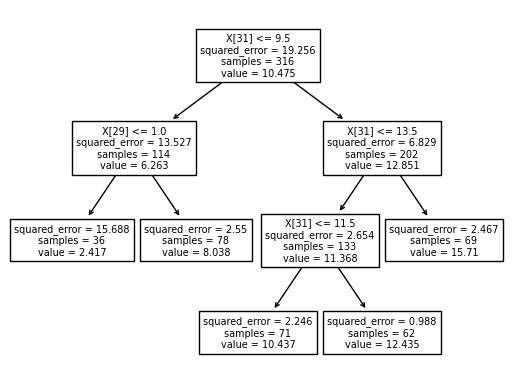

In [50]:
tree.plot_tree(clf)

# Let's dig in with Multiple Regression

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
y_train_pre = lr.predict(x_train)

In [57]:
y_test_pre = lr.predict(x_test)

In [58]:
mse_test = mean_squared_error(y_test,y_test_pre)

In [59]:
r2_test= r2_score(y_test,y_test_pre)

In [60]:
mse_train =mean_squared_error(y_train,y_train_pre)

In [61]:
r2_train =r2_score(y_train,y_train_pre)

### Accuracy for test data

In [62]:
print('mean_squared_error:', mse_test)
print('R2 Score:',r2_test)

mean_squared_error: 5.645265542791851
R2 Score: 0.7953787140783362


### Accuracy for training data

In [63]:
print('mean_squared_error:', mse_train)
print('R2 Score:',r2_train)

mean_squared_error: 2.834042973037707
R2 Score: 0.8528204785553677


## In Conclusion, the training data for both decision tree regressor and multiple linear regression model the predicted values have higher accuracy compared to their testing data. If we look more closer in training data, mulitiple linear regression is producing more accurate data than decision tree regression model

# Question 3:Predicting value using decision tree classifier

In [64]:
def predeict_FinalExamGrade(school, sex, address, famsize, Pstatus, Mjob, Fjob,
       reason, guardian, schoolsup, famsup, paid, activities,
       nursery, higher, internet, romantic, age, Medu, Fedu,
       traveltime, studytime, failures, famrel, freetime, goout,
       Dalc, Walc, health, absences, G1, G2):
    a = clf.predict([[school, sex, address, famsize, Pstatus, Mjob, Fjob,
       reason, guardian, schoolsup, famsup, paid, activities,
       nursery, higher, internet, romantic, age, Medu, Fedu,
       traveltime, studytime, failures, famrel, freetime, goout,
       Dalc, Walc, health, absences, G1, G2]])
    return a

In [65]:
predeict_FinalExamGrade(0,0,1,0,0,0,4,0,1,1,0,1,2,0,1,1,1,0,0,1,0,0,4,3,4,1,1,3,6,5,6,6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([8.03846154])

![](https://media.giphy.com/media/KqZW4NMpogrB0UN6VU/giphy.gif)